In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from Tools import commonfxns as cf, OAPBuoyData as OAP, mplRC, evalfxns as ev, OAPBuoyComp as bc, diagsPP, frequencyBands as fb
import netCDF4 as nc
import cftime
import datetime as dt
import cmocean
import pickle
import scipy.optimize as scopt

rc=mplRC.notebookRC2()
%matplotlib inline
mpl.rc('figure', dpi=200)

Matplotlib is building the font cache; this may take a moment.


In [2]:
def makeplot(var):
    fig,ax=plt.subplots(2,2,figsize=(10,3),gridspec_kw={'width_ratios':[2,1],'hspace':.4})
    dsid=OAP.getID('Kodiak')
    mmm=bc.loadMoorComp(dsid,var,path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
    #fig,ax=plt.subplots(1,1,figsize=(10,1))
    ax[0,0].plot(mmm.mod_tdt,mmm.mod_val,color='dodgerblue')
    ax[0,0].plot(mmm.obs_tdt,mmm.obs_val,color='orange')
    ax[0,0].set_title(f'Kodiak {var}')
    dsid=OAP.getID('GAKOA')
    mmm=bc.loadMoorComp(dsid,var,path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
    #fig,ax=plt.subplots(1,1,figsize=(10,1))
    ax[1,0].plot(mmm.mod_tdt,mmm.mod_val,color='navy')
    ax[1,0].plot(mmm.obs_tdt,mmm.obs_val,color='red')
    ax[1,0].set_title(f'GAKOA {var}')

    dsid=OAP.getID('Kodiak')
    mmm=bc.loadMoorComp(dsid,var,path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
    #fig,ax=plt.subplots(1,1,figsize=(10,1))
    ax[0,1].plot(mmm.mod_tdt,mmm.mod_val,color='dodgerblue')
    ax[0,1].plot(mmm.obs_tdt,mmm.obs_val,color='orange')
    ax[0,1].set_title(f'Kodiak {var}')
    ax[0,1].set_xlim(dt.datetime(2012,1,1),dt.datetime(2018,1,1))
    dsid=OAP.getID('GAKOA')
    mmm=bc.loadMoorComp(dsid,var,path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
    #fig,ax=plt.subplots(1,1,figsize=(10,1))
    ax[1,1].plot(mmm.mod_tdt,mmm.mod_val,color='navy')
    ax[1,1].plot(mmm.obs_tdt,mmm.obs_val,color='red')
    ax[1,1].set_title(f'GAKOA {var}')
    ax[1,1].set_xlim(dt.datetime(2012,1,1),dt.datetime(2018,1,1))
    
    for iax in [ax[0,1],ax[1,1]]:
        for ii in range(2013,2017):
            iax.axvspan(dt.datetime(ii,5,1),dt.datetime(ii,9,1),color='gray',alpha=.1)
    return fig

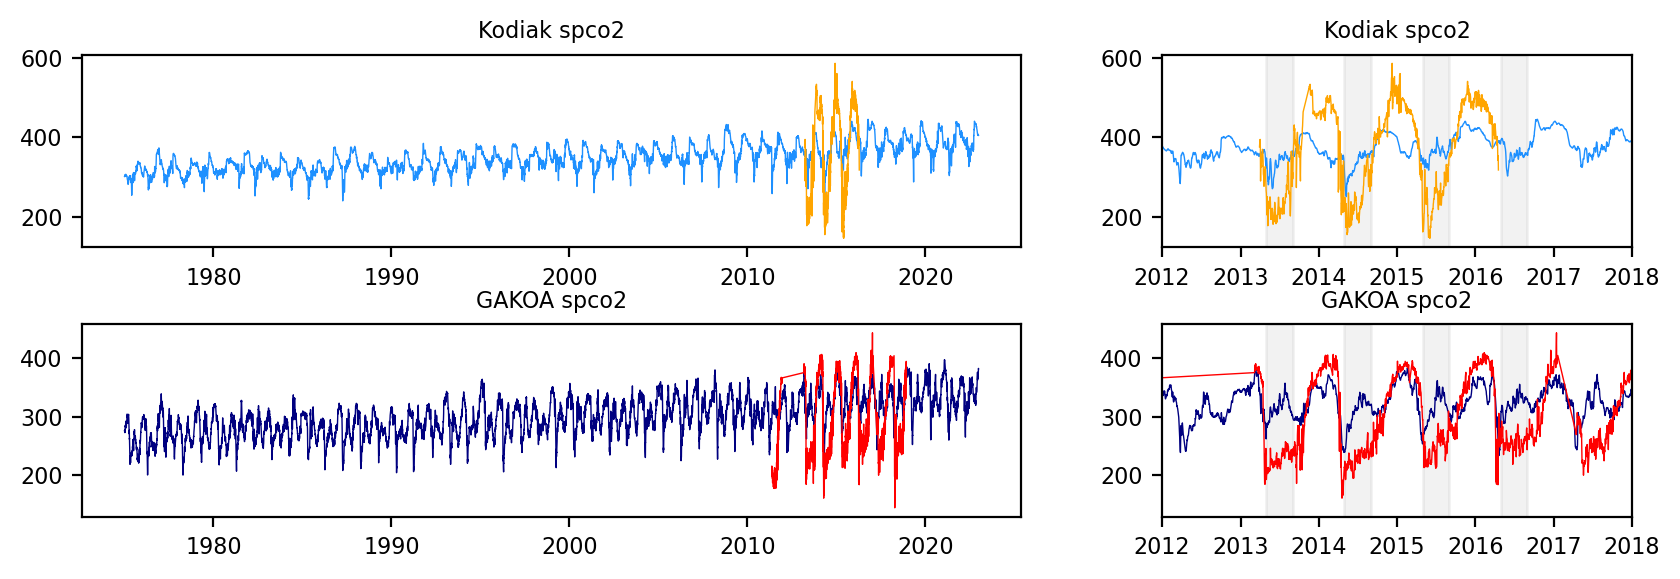

In [3]:
fig=makeplot('spco2')
fig.savefig('Kodiak_spco2.png')

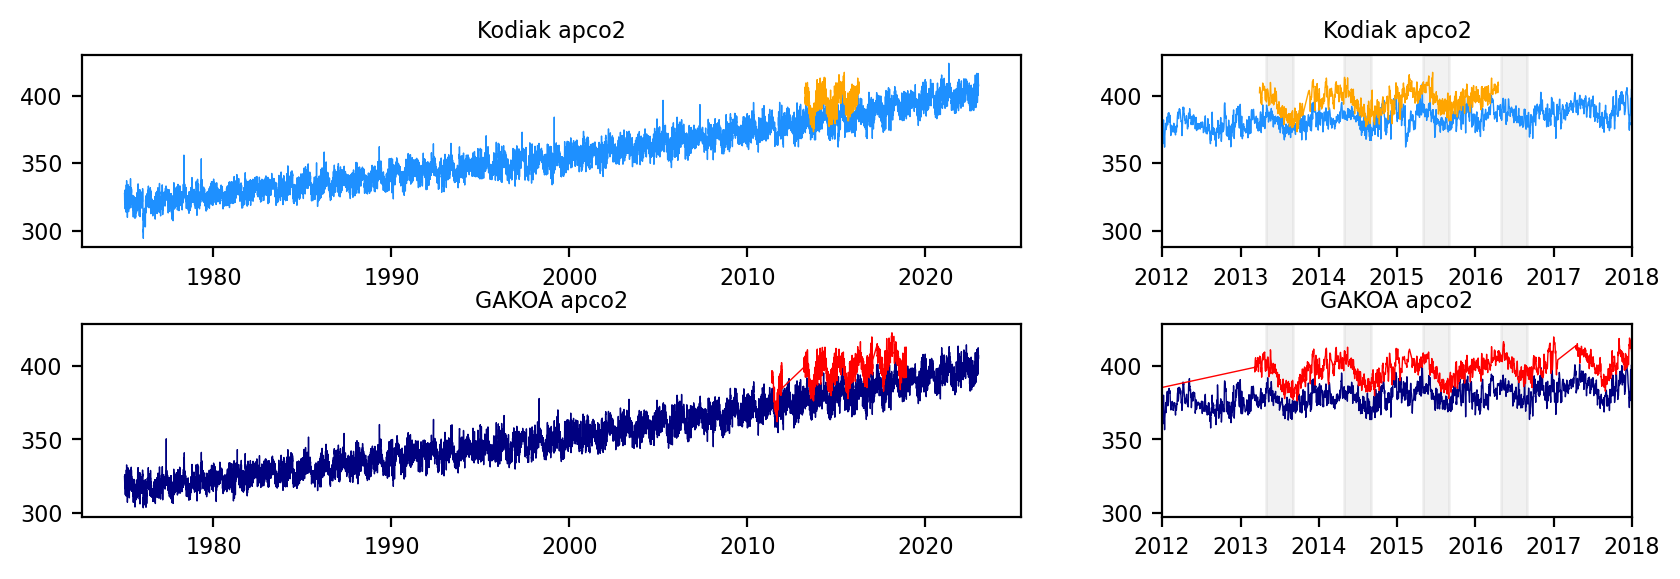

In [4]:
fig=makeplot('apco2')
fig.savefig('Kodiak_apco2.png')

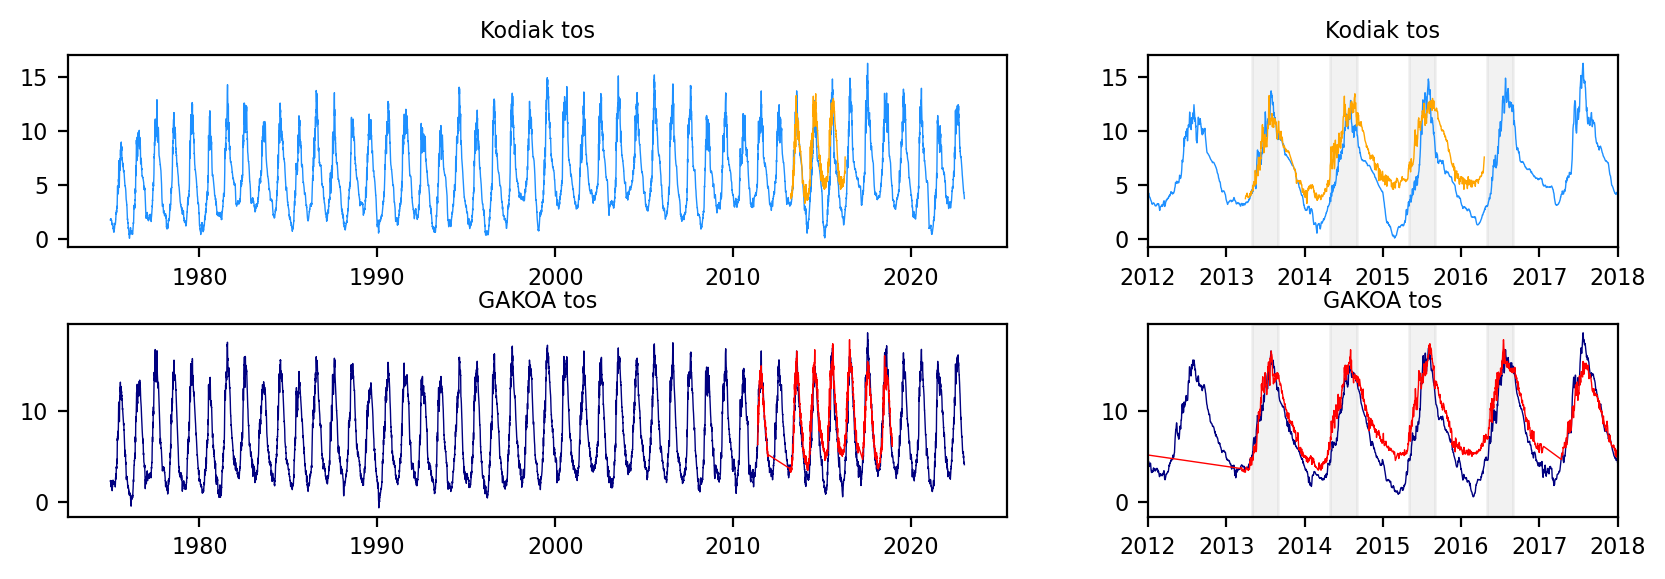

In [5]:
fig=makeplot('tos')
fig.savefig('Kodiak_tos.png')

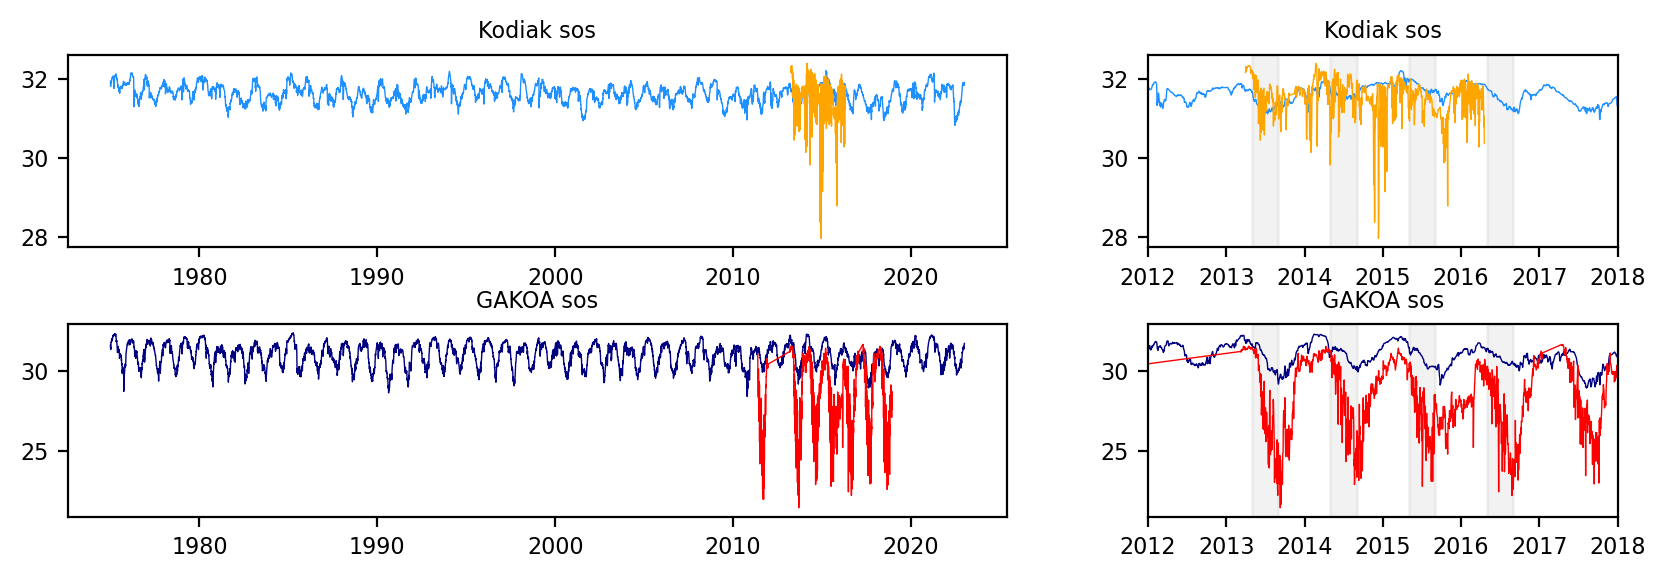

In [6]:
fig=makeplot('sos')
fig.savefig('Kodiak_sos.png')

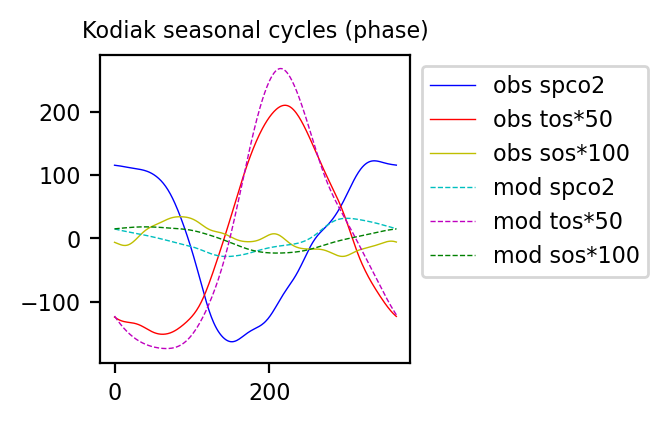

In [14]:
mmmCK=bc.loadMoorComp(OAP.getID('Kodiak'),'spco2',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
mmmTK=bc.loadMoorComp(OAP.getID('Kodiak'),'tos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
mmmSK=bc.loadMoorComp(OAP.getID('Kodiak'),'sos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')

fig,ax=plt.subplots(1,1,figsize=(2,2))
ax.plot(mmmCK.obs_gsmooth,'b-',label='obs spco2')
ax.plot(mmmTK.obs_gsmooth*50,'r-',label='obs tos*50')
ax.plot(mmmSK.obs_gsmooth*100,'y-',label='obs sos*100')
ax.plot(mmmCK.mod_gsmooth,'c--',label='mod spco2')
ax.plot(mmmTK.mod_gsmooth*50,'m--',label='mod tos*50')
ax.plot(mmmSK.mod_gsmooth*100,'g--',label='mod sos*100')
ax.legend(bbox_to_anchor=[1,1])
ax.set_title('Kodiak seasonal cycles (phase)')
fig.savefig('Kodiak_seas.png')

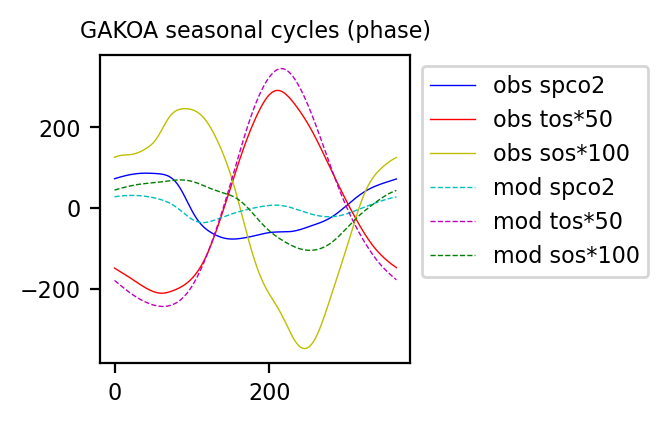

In [15]:
mmmCK=bc.loadMoorComp(OAP.getID('GAKOA'),'spco2',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
mmmTK=bc.loadMoorComp(OAP.getID('GAKOA'),'tos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
mmmSK=bc.loadMoorComp(OAP.getID('GAKOA'),'sos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')

fig,ax=plt.subplots(1,1,figsize=(2,2))
ax.plot(mmmCK.obs_gsmooth,'b-',label='obs spco2')
ax.plot(mmmTK.obs_gsmooth*50,'r-',label='obs tos*50')
ax.plot(mmmSK.obs_gsmooth*100,'y-',label='obs sos*100')
ax.plot(mmmCK.mod_gsmooth,'c--',label='mod spco2')
ax.plot(mmmTK.mod_gsmooth*50,'m--',label='mod tos*50')
ax.plot(mmmSK.mod_gsmooth*100,'g--',label='mod sos*100')
ax.legend(bbox_to_anchor=[1,1])
ax.set_title('GAKOA seasonal cycles (phase)')
fig.savefig('GAKOA_seas.png')

In [9]:
mmm1=bc.loadMoorComp(OAP.getID('GAKOA'),'sos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')

In [10]:
print('Min GAKOA obs sos:',np.min(mmm1.obs_val))

Min GAKOA obs sos: 21.4505


In [11]:
print('Min 2013 Oct/Sept model sos:',np.min(mmm1.mod_val[(mmm1.mod_tdt>dt.datetime(2013,8,20))&(mmm1.mod_tdt<dt.datetime(2013,9,15))]))

Min 2013 Oct/Sept model sos: 29.174992


In [12]:
print('difference:',29.2-21.4)

difference: 7.800000000000001
